In [4]:
import os

import skimage.io as io
from skimage.color import rgb2grey
import matplotlib.pyplot as plt
import skimage.util as u
import numpy as np

In [31]:
"""
Hyperparameters that are magnification-dependent:
- hough_radii => size of hough circles for FOV 
- crop region around hough_circle center
- crop region about center of image (if not using hough circle)
- region_prop.area -- is in pixels?
- 

"""

def plot_large(arr, x, y):
    figure = plt.figure(figsize=(x,y))
    ax = figure.add_subplot(111)
    ax.imshow(arr)

In [7]:

# path_to_cells = '../Plates_given_to_manu/2020-01-15_plate4_AEP_Feb3_6mousesera'
path_to_cells = '/Users/bryant.chhun/PycharmProjects/array-imager/Plates_given_to_manu/2020-01-15_plate4_AEP_Feb3_6mousesera'
images = [file for file in os.listdir(path_to_cells) if '.png' in file]

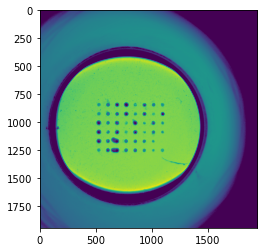

In [9]:
# im = io.imread(path_to_cells+os.sep+images[0])
im = io.imread(path_to_cells+os.sep+'A8.png')

image = rgb2grey(im)
plt.imshow(image)

In [10]:
from skimage.filters import threshold_minimum
from copy import deepcopy

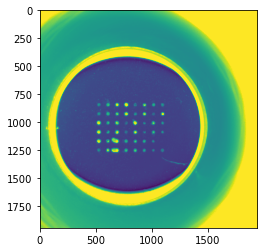

In [11]:
inv = u.invert(image)
plt.imshow(inv)

In [12]:
thresh = threshold_minimum(inv)
thresh

0.4806580009191176

(array([1.00000e+00, 1.00000e+00, 1.00000e+00, 8.00000e+00, 2.20000e+01,
        5.50000e+01, 8.80000e+01, 1.27000e+02, 2.06000e+02, 2.31000e+02,
        2.76000e+02, 3.26000e+02, 4.15000e+02, 4.31000e+02, 5.24000e+02,
        5.34000e+02, 5.68000e+02, 6.52000e+02, 6.85000e+02, 7.43000e+02,
        9.46000e+02, 1.04700e+03, 1.14500e+03, 1.24000e+03, 1.60500e+03,
        2.03400e+03, 2.28100e+03, 2.57900e+03, 2.92200e+03, 3.61200e+03,
        3.59700e+03, 3.53800e+03, 3.65200e+03, 4.00000e+03, 4.65200e+03,
        4.48500e+03, 5.07000e+03, 5.89500e+03, 6.98200e+03, 7.28800e+03,
        8.05800e+03, 9.63800e+03, 1.22880e+04, 1.30710e+04, 1.80220e+04,
        2.49750e+04, 3.95650e+04, 5.14260e+04, 6.87320e+04, 8.71440e+04,
        9.46810e+04, 9.95080e+04, 9.47160e+04, 8.83100e+04, 7.80140e+04,
        7.65550e+04, 5.84440e+04, 4.62110e+04, 3.63520e+04, 2.74360e+04,
        1.97780e+04, 1.58690e+04, 1.24560e+04, 1.14340e+04, 8.54400e+03,
        7.17800e+03, 5.99600e+03, 5.18600e+03, 4.50

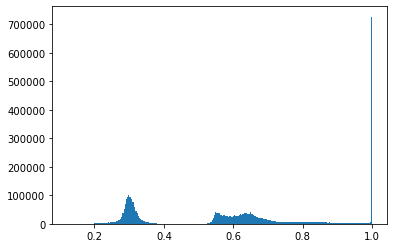

In [53]:
plt.hist(inv.ravel(), bins=256)


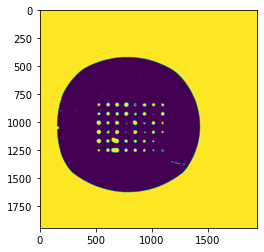

In [13]:
binary = deepcopy(inv)
binary[inv<thresh] = 0
binary[inv>=thresh] = 1

plt.imshow(binary)


In [14]:
"""
try hough circle first
"""
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter

In [15]:
edges = canny(binary, sigma=3)

In [16]:
# set hough_radii based on the magnification of detection
hough_radii = [300, 400, 500, 600]
hough_res = hough_circle(edges, hough_radii)

hough_res

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [17]:
aaccums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1)


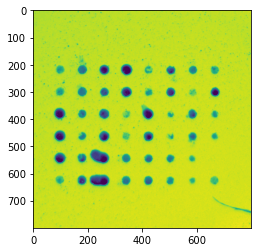

In [20]:
# crop smaller than radus based on magnification of detection
crop = image[cy[0]-(radii[0]-200):cy[0]+(radii[0]-200), cx[0]-(radii[0]-200):cx[0]+(radii[0]-200)]
#
plt.imshow(crop)

In [18]:
# 'crop' is greyscale, 'crop_im' is RGB
crop_im = im[cy[0]-(radii[0]-200):cy[0]+(radii[0]-200), cx[0]-(radii[0]-200):cx[0]+(radii[0]-200)]

(array([1.0000e+00, 2.0000e+00, 3.0000e+00, 6.0000e+00, 2.1000e+01,
        7.0000e+01, 1.0800e+02, 2.2400e+02, 4.8900e+02, 9.5100e+02,
        1.6640e+03, 3.6170e+03, 6.6790e+03, 9.9280e+03, 1.7318e+04,
        2.5350e+04, 3.3307e+04, 4.1116e+04, 3.9901e+04, 4.6095e+04,
        4.7887e+04, 3.9663e+04, 3.9980e+04, 4.2762e+04, 3.5113e+04,
        3.3926e+04, 2.6400e+04, 2.1382e+04, 1.8061e+04, 1.1833e+04,
        9.4040e+03, 7.8080e+03, 5.3110e+03, 3.9250e+03, 3.3920e+03,
        2.7040e+03, 2.2180e+03, 1.9920e+03, 1.6740e+03, 1.3970e+03,
        1.3880e+03, 1.1900e+03, 1.1240e+03, 1.1180e+03, 8.7900e+02,
        8.9900e+02, 8.4000e+02, 7.3000e+02, 7.0300e+02, 6.3900e+02,
        5.8800e+02, 5.9900e+02, 5.7200e+02, 5.6100e+02, 5.5200e+02,
        5.4900e+02, 4.7400e+02, 5.0800e+02, 4.7600e+02, 4.4700e+02,
        4.7100e+02, 4.5600e+02, 4.5100e+02, 4.0700e+02, 3.9000e+02,
        3.9000e+02, 3.8400e+02, 3.8800e+02, 4.1900e+02, 3.6900e+02,
        3.6900e+02, 3.9900e+02, 3.8300e+02, 3.80

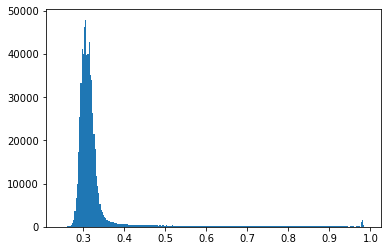

In [21]:
inv_crop = u.invert(crop)
plt.hist(inv_crop.ravel(), bins=256)

In [25]:
"""
Here we can try playing with a few thresholds to properly ID the spots

"""
t = threshold_minimum(inv_crop)
t


0.8072760746017157

In [26]:
import numpy as np
from skimage.morphology import disk, ball, binary_opening, binary_erosion


def get_unimodal_threshold(input_image):
    """Determines optimal unimodal threshold

    https://users.cs.cf.ac.uk/Paul.Rosin/resources/papers/unimodal2.pdf
    https://www.mathworks.com/matlabcentral/fileexchange/45443-rosin-thresholding

    :param np.array input_image: generate mask for this image
    :return float best_threshold: optimal lower threshold for the foreground
     hist
    """

    hist_counts, bin_edges = np.histogram(
        input_image,
        bins=256,
        range=(input_image.min(), np.percentile(input_image, 99.5))
    )
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # assuming that background has the max count
    max_idx = np.argmax(hist_counts)
    int_with_max_count = bin_centers[max_idx]
    p1 = [int_with_max_count, hist_counts[max_idx]]

    # find last non-empty bin
    pos_counts_idx = np.where(hist_counts > 0)[0]
    last_binedge = pos_counts_idx[-1]
    p2 = [bin_centers[last_binedge], hist_counts[last_binedge]]

    best_threshold = -np.inf
    max_dist = -np.inf
    for idx in range(max_idx, last_binedge, 1):
        x0 = bin_centers[idx]
        y0 = hist_counts[idx]
        a = [p1[0] - p2[0], p1[1] - p2[1]]
        b = [x0 - p2[0], y0 - p2[1]]
        cross_ab = a[0] * b[1] - b[0] * a[1]
        per_dist = np.linalg.norm(cross_ab) / np.linalg.norm(a)
        if per_dist > max_dist:
            best_threshold = x0
            max_dist = per_dist
    assert best_threshold > -np.inf, 'Error in unimodal thresholding'
    return best_threshold


def create_unimodal_mask(input_image, str_elem_size=3):
    """Create a mask with unimodal thresholding and morphological operations

    unimodal thresholding seems to oversegment, erode it by a fraction

    :param np.array input_image: generate masks from this image
    :param int str_elem_size: size of the structuring element. typically 3, 5
    :return: mask of input_image, np.array
    """

    if np.min(input_image) == np.max(input_image):
        thr = np.unique(input_image)
    else:
        thr = get_unimodal_threshold(input_image)
    if len(input_image.shape) == 2:
        str_elem = disk(str_elem_size)
    else:
        str_elem = ball(str_elem_size)
    # remove small objects in mask
    thr_image = binary_opening(input_image > thr, str_elem)
    mask = binary_erosion(thr_image, str_elem)
    return mask

In [27]:
uni_t = get_unimodal_threshold(inv_crop)
uni_t

0.361502662377451

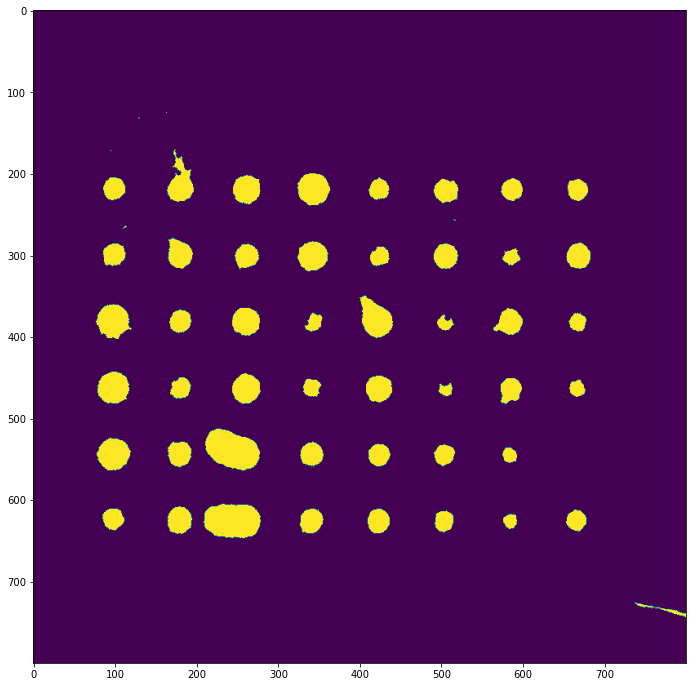

In [32]:
uni_mask = create_unimodal_mask(inv_crop)

plot_large(uni_mask, 12, 12)

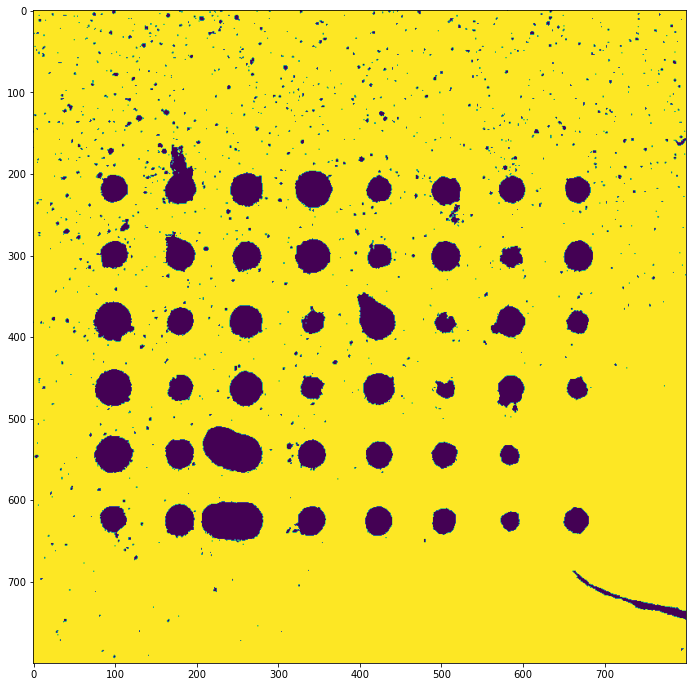

In [33]:

out_binary = inv_crop < uni_t
plot_large(out_binary, 12,12)

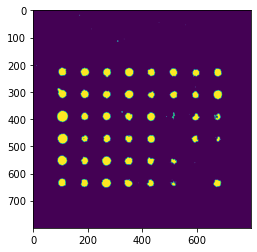

In [62]:
from copy import copy
inv_crop_binary = copy(inv_crop)
inv_crop_binary[inv_crop_binary<t] = 0
inv_crop_binary[inv_crop_binary>=t] = 1

plt.imshow(inv_crop_binary)

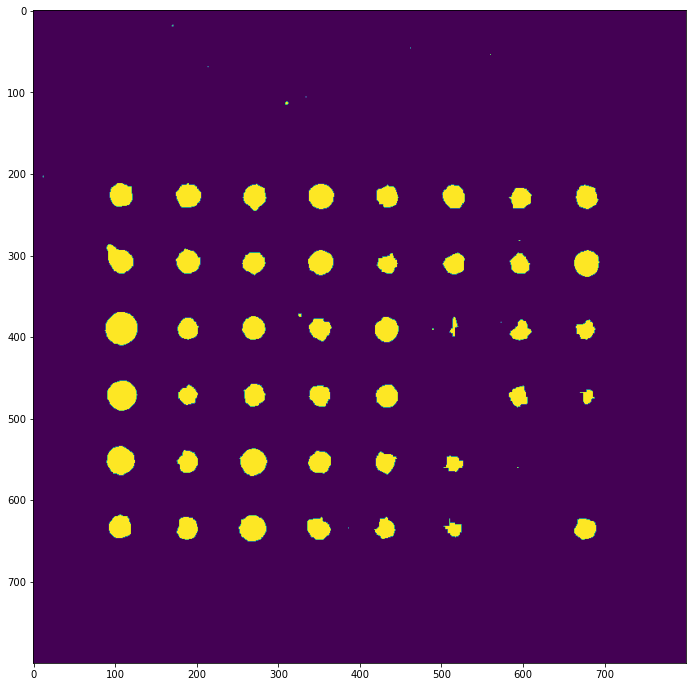

In [122]:
# from scipy.ndimage.morphology import binary_closing
# inv_crop_binary_closed = binary_closing(inv_crop_binary, structure=np.ones((10,10)))

from skimage.morphology import binary_closing
inv_crop_binary_closed = binary_closing(inv_crop_binary, selem=np.ones((10,10)))


figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(111)
ax.imshow(inv_crop_binary_closed)

In [63]:
from skimage import measure

labels = measure.label(inv_crop_binary_closed)

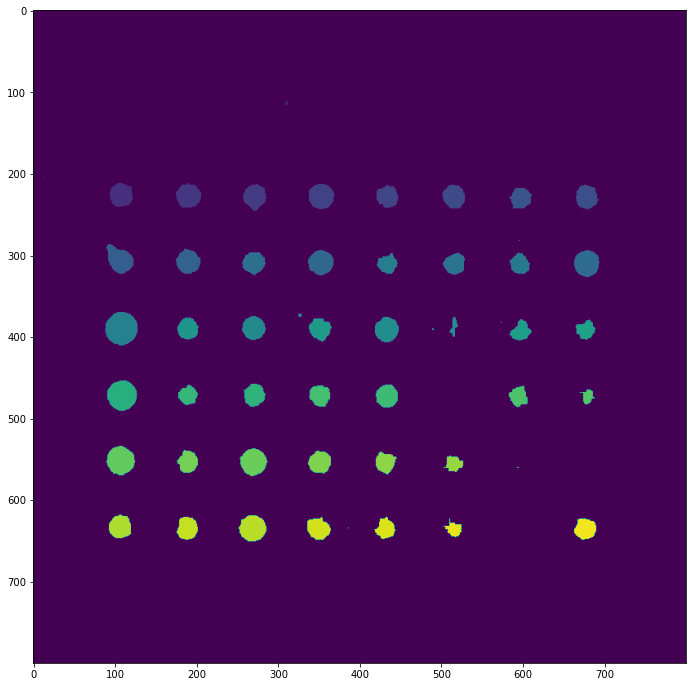

In [22]:
figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(111)
ax.imshow(labels)

In [123]:
props = measure.regionprops(labels, intensity_image=crop)
# props = measure.regionprops(labels, intensity_image=crop_im)

In [124]:
c=0
for prop in props:
    if prop.area > 50:
        print(f"{prop.area} c = {prop.centroid}")
        c+=1
print(c)


657 c = (226.234398782344, 107.61491628614917)
704 c = (227.2471590909091, 190.0284090909091)
651 c = (228.21658986175115, 271.2964669738863)
763 c = (227.826998689384, 352.653997378768)
559 c = (228.05903398926654, 433.778175313059)
619 c = (228.23424878836835, 515.2520193861067)
613 c = (228.61990212071777, 677.8874388254486)
515 c = (230.126213592233, 597.1165048543689)
789 c = (305.3814955640051, 105.72496831432193)
668 c = (307.937125748503, 189.688622754491)
730 c = (308.90410958904107, 352.23835616438356)
785 c = (310.01783439490447, 677.9426751592357)
574 c = (309.2770034843206, 270.102787456446)
519 c = (310.5664739884393, 516.0674373795761)
452 c = (310.7986725663717, 596.0353982300885)
424 c = (310.7688679245283, 433.9481132075472)
1257 c = (389.7112171837709, 107.94828957836118)
636 c = (389.1996855345912, 269.99685534591197)
692 c = (391.1199421965318, 432.8742774566474)
112 c = (387.54464285714283, 515.2410714285714)
526 c = (390.0361216730038, 189.35171102661596)
547 c =

In [66]:
"""
1) create a map of region props to cell positions
2) using centroid, do some sorting so it's in row-column order
3) then make assignments

- no, need to do direct position to centroid mapping
- do a simple min distance func to array position
- map all centroids onto an array of a certain shape 
    --> divide centroid positions by the image area in pixels
    --> cast to int, then do assignment and check for collisions

"""

"\n1) create a map of region props to cell positions\n2) using centroid, do some sorting so it's in row-column order\n3) then make assignments\n\n- no, need to do direct position to centroid mapping\n- do a simple min distance func to array position\n- map all centroids onto an array of a certain shape \n    --> divide centroid positions by the image area in pixels\n    --> cast to int, then do assignment and check for collisions\n\n"

In [26]:
# (x, y) = inv_crop_binary.shape
# c = 0
# # find minx, miny to "zero center" the array
# minx = x
# miny = y
# for prop in props:
#     if prop.area > 100:
#         if prop.centroid[0] < minx:
#             minx = prop.centroid[0]
#         if prop.centroid[1] < miny:
#             miny = prop.centroid[1]
        
# print((minx, miny, maxx, maxy))

# # map the centroid positions to array index values
# cent_list = []
# extra_scale_x_max = 0
# extra_scale_y_max = 0
# for prop in props:
#     if prop.area > 100:
#         cx, cy = prop.centroid
#         csx = cx-minx
#         csy = cy-miny
#         # "zero center"
#         # scale by number of pixels
#         # mutiply by number of wells
#         norm_cent_x = 5*(csx/(x))
#         norm_cent_y = 7*csy/(y)
# #         print(f"\ncentroid = {prop.centroid}\n\tnorm_cent = {norm_cent_x, norm_cent_y}")
#         if norm_cent_x > extra_scale_x_max:
#             extra_scale_x_max = norm_cent_x
#         if norm_cent_y > extra_scale_y_max:
#             extra_scale_y_max = norm_cent_y
#         cent_list.append((norm_cent_x, norm_cent_y))
#         c+=1
# print(c)

# chk_list = []
# for cent in cent_list:
#     ex_x = 5*cent[0]/extra_scale_x_max
#     ex_y = 7*cent[1]/extra_scale_y_max
#     print(f"\tnorm_again = {int(round(ex_x)), int(round(ex_y))}")
#     chk_list.append((int(round(ex_x)), int(round(ex_y))))

# if len(chk_list) != len(set(chk_list)):
#     print("ERROR, DUPLICATE ENTRIES")
# # ID the range of newly scaled centroid positions, rescale to index

# # no need to sort as we can call directly from index


In [125]:
"""
Creates a dictionary whose keys are (centroid_x, centroid_y) scaled to int
    and whose values are region_prop objects
"""
(x, y) = inv_crop_binary.shape
c = 0
# find minx, miny to "zero center" the array
minx = x
miny = y
# find maxx, maxy to scale to array index values
maxx = 0
maxy = 0
for prop in props:
    if prop.area > 100:
        if prop.centroid[0] < minx:
            minx = prop.centroid[0]
        if prop.centroid[1] < miny:
            miny = prop.centroid[1]
        if prop.centroid[0] > maxx:
            maxx = prop.centroid[0]
        if prop.centroid[1] > maxy:
            maxy = prop.centroid[1]
        
print((minx, miny, maxx, maxy))

# use centroid positions to map prop to array index values
chk_list = []
cent_map = {}
for prop in props:
    if prop.area > 100:
        cx, cy = prop.centroid
        csx = cx-minx
        csy = cy-miny
        
        smaxx = maxx-minx
        smaxy = maxy-miny
        
        # "zero center"
        # scale by number of pixels
        # mutiply by number of wells
        norm_cent_x = int(round(5*(csx/smaxx)))
        norm_cent_y = int(round(7*(csy/smaxy)))
        
        print(f"\ncentroid = {prop.centroid}\n\tnorm_cent = {norm_cent_x, norm_cent_y}")
        
        chk_list.append((norm_cent_x, norm_cent_y))
        cent_map[(norm_cent_x, norm_cent_y)] = prop
        c+=1
print(c)

# check if all keys (coordinates) are unique.
if len(chk_list) != len(set(chk_list)):
    print("ERROR, DUPLICATE ENTRIES")


(226.234398782344, 105.72496831432193, 635.6264591439689, 679.2989130434783)

centroid = (226.234398782344, 107.61491628614917)
	norm_cent = (0, 0)

centroid = (227.2471590909091, 190.0284090909091)
	norm_cent = (0, 1)

centroid = (228.21658986175115, 271.2964669738863)
	norm_cent = (0, 2)

centroid = (227.826998689384, 352.653997378768)
	norm_cent = (0, 3)

centroid = (228.05903398926654, 433.778175313059)
	norm_cent = (0, 4)

centroid = (228.23424878836835, 515.2520193861067)
	norm_cent = (0, 5)

centroid = (228.61990212071777, 677.8874388254486)
	norm_cent = (0, 7)

centroid = (230.126213592233, 597.1165048543689)
	norm_cent = (0, 6)

centroid = (305.3814955640051, 105.72496831432193)
	norm_cent = (1, 0)

centroid = (307.937125748503, 189.688622754491)
	norm_cent = (1, 1)

centroid = (308.90410958904107, 352.23835616438356)
	norm_cent = (1, 3)

centroid = (310.01783439490447, 677.9426751592357)
	norm_cent = (1, 7)

centroid = (309.2770034843206, 270.102787456446)
	norm_cent = (1, 2)

In [126]:
len(chk_list), len(set(chk_list))

(44, 44)

In [127]:
list(cent_map.items())[0][1]

In [29]:
# # sort the centroid list based on the keys (which are centroid positions)
# """
# This block of code is most likely not useful
# """
# from copy import deepcopy
# sorted_cent_list = deepcopy(cent_list)

# list(cent_list[0].keys())[0][0]

# f = lambda x: list(x.keys())[0][0]
# sorted_cent_list.sort(key=lambda x: (list(x.keys())[0][1], list(x.keys())[0][0]))

# for idx, item in enumerate(sorted_cent_list):
#     if list(item.keys())[0][0] == list((cent_list[idx]).keys())[0][0]:
#         print("True")
#     else:
#         print("False")
        

In [128]:
"""
try inserting the props into the array
"""

image_array = np.empty(shape=(6, 8), dtype=object)
for key, value in cent_map.items():
    image_array[key[0],key[1]] = value

In [132]:
f = image_array.flatten()
d = [k.intensity_image if k is not None else None for k in f]
mean_int_array = np.array(d)
np.reshape(mean_int_array, image_array.shape)

array([[array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5549502 ,
        0.53954667, 0.51576431, 0.49306824, 0.50682   , 0.51604706,
        0.54321529, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.52948627, 0.51156   ,
        0.4804702 , 0.44380706, 0.4611451 , 0.45839216, 0.48413882,
        0.52250627, 0.54713686, 0.5527251 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.53816275, 0.51322667, 0.48969725,
        0.43844902, 0.41355059, 0.38804902, 0.40208353, 0.43847882,
        0.47684627

TypeError: Invalid shape (28,) for image data

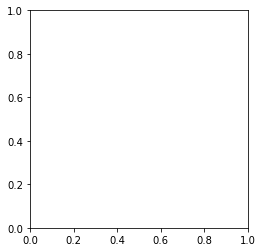

In [134]:
plt.imshow(mean_int_array[0][0])